# SARAH LIU, Homework #2
BMCS 4480: Statistical Machine Learning for Genomics Spring 2024

Collaborated with William Specht



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as stats
import scanpy as sc
import anndata as ad

from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
genes = [[]]

In [3]:
with open('pbmc_6Kcells_500genes.txt', 'r') as file:
    genes = file.read().split('\n')

In [4]:
cell_ids = genes.pop(0).split("\t")
cell_ids.pop(0)

cell_ids = np.array(cell_ids)
cell_ids

array(['4', '13', '16', ..., '8240', '8273', '8294'], dtype='<U4')

In [5]:
data = np.zeros((500, len(genes[0].split("\t"))-1))
gene_names = []

for r in range(len(genes)-1):
    row = genes[r].split("\t")
    gene_names.append(row.pop(0))
    data[r] = row
    
data = data.T

In [6]:
data.shape

(6825, 500)

In [78]:
data

array([[ 0.,  0.,  0., ...,  2.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  2.,  2.,  5.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  3.],
       [ 4.,  0.,  4., ...,  0.,  1.,  3.],
       [ 0.,  0.,  0., ...,  2.,  0., 10.]])

# 1a.

(array([  28.,  163.,  396., 1193., 1923., 1955.,  816.,  261.,   71.,
          19.]),
 array([2.87098881, 2.98951561, 3.1080424 , 3.22656919, 3.34509598,
        3.46362277, 3.58214957, 3.70067636, 3.81920315, 3.93772994,
        4.05625674]),
 <BarContainer object of 10 artists>)

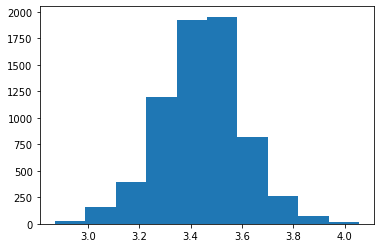

In [7]:
# data before normalization
plt.hist(np.log10(np.sum(data, axis=1)))

In [7]:
# Normalizing data, scaling to median library size
library_sizes = np.sum(data, axis=1)
median_lib_size = np.median(library_sizes)

normalize_lib_size = np.array([median_lib_size / np.sum(data, axis=1)])

In [80]:
# Scaling each expression count
norm_data = data * normalize_lib_size.T
norm_data+0.1

array([[ 0.1       ,  0.1       ,  0.1       , ...,  2.83080661,
         0.1       ,  0.1       ],
       [ 0.1       ,  0.1       ,  0.1       , ...,  0.86275787,
         0.86275787,  0.86275787],
       [ 0.1       ,  0.1       ,  0.1       , ...,  1.41986848,
         1.41986848,  3.39967121],
       ...,
       [ 0.1       ,  0.1       ,  0.1       , ...,  0.1       ,
         0.1       ,  3.17327743],
       [ 2.69764271,  0.1       ,  2.69764271, ...,  0.1       ,
         0.74941068,  2.04823203],
       [ 0.1       ,  0.1       ,  0.1       , ...,  2.19467015,
         0.1       , 10.57335073]])

In [9]:
# Embedding the normalized data to 2D using UMAP
adata = ad.AnnData(np.log10(norm_data +0.1))

adata.var_names = gene_names
adata.obs_names = cell_ids
adata

AnnData object with n_obs × n_vars = 6825 × 500

In [10]:
# Calculating first 20 principal components
sc.pp.pca(adata, 20)

/Users/sarahmialiu/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


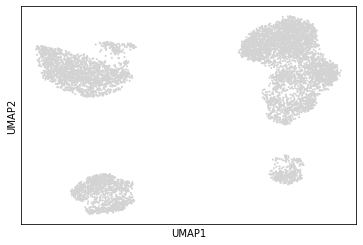

In [11]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata)

# 1b.

In [12]:
np.sum(adata.uns['pca']['variance_ratio'])

0.40931207945544507

20 is not a good choice for the number of principal components. Summing the explained variance of each principal component gives a cumulative explained variance of only 40.9%. Since 70-80% explained variance is generally acceptable, having 20 principal components is not sufficient.

In [13]:
# Calculating first 100 principal components
sc.pp.pca(adata, 100)

In [14]:
np.sum(adata.uns['pca']['variance_ratio'])

0.6392899161491882

For a threshold of at least 60%, 100 principal components yields a cumulative explained variance of 63.9%.

/Users/sarahmialiu/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


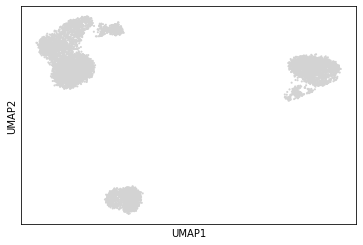

In [15]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata)

# 2.

In [16]:
# Re-calculating first 20 principal components
sc.pp.pca(adata, 20)
sc.pp.neighbors(adata)

X_pca = adata.obsm['X_pca'] 

/Users/sarahmialiu/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


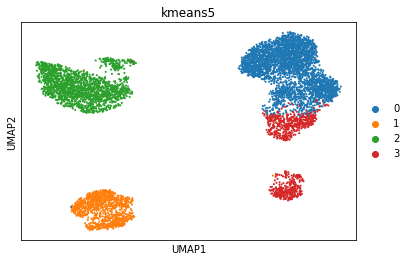

In [17]:
# Clustering cells with K-Means (K=4)
kmeans = KMeans(n_clusters = 4).fit(X_pca) 
adata.obs['kmeans5'] = kmeans.labels_.astype(str)

sc.tl.umap(adata)
sc.pl.umap(adata, color=['kmeans5'])

4 is visually appears to appropriate number of clusters. From the U-map, we can see that the cells are already roughly divided into four independent groups.

# 3.

/Users/sarahmialiu/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


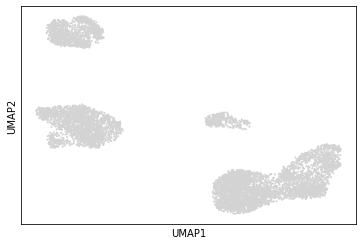

In [26]:
# Calculating 30-nearest neighbor graph
sc.pp.neighbors(adata, n_neighbors=30, metric='manhattan')

sc.tl.umap(adata)
sc.pl.umap(adata)

In [22]:
adata.obsp['connectivities']

<6825x6825 sparse matrix of type '<class 'numpy.float32'>'
	with 298198 stored elements in Compressed Sparse Row format>

<Axes: >

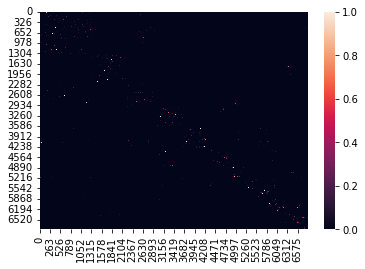

In [23]:
sns.heatmap(adata.obsp['connectivities'].todense())

The above nearest neighbors and adjacency matrix is computed using the Manhattan Distance as the distance metric. Manhattan Distance is similar to Euclidean Distance, which is generally the standard distance metric for measuring the similarity between two observations. However, where Euclidean Distance calculates the shortest path between datapoints with the Pythagorean Theorem, the Manhattan Distance calculates the distance along a grid-like path, which can include turns and is generally regarded as a better choice for high-dimensional data.

# 4.

In [70]:
# Clustering with Leiden (Louvain) algorithm
sc.tl.leiden(adata)

In [83]:
kmeans = KMeans(n_clusters = 9).fit(X_pca) 
adata.obs['kmeans5'] = kmeans.labels_.astype(str)

/Users/sarahmialiu/opt/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


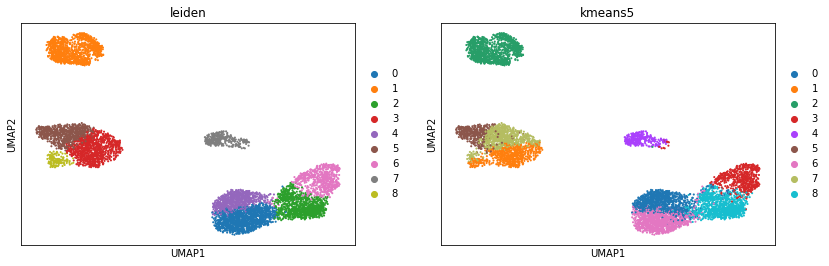

In [84]:
sc.tl.umap(adata)
sc.pl.umap(adata, color=['leiden', 'kmeans5'])

The Louvain algorithm appears slightly better than the corresponding K-Means clustering with 9 clusters. For example, in the K-Means cluster 3, there seems to be some spillover from cluster 8 at the edges of the group. This scattering does not seem to be in line with what the U-map visually depicts. Addtionally, the K-Means algorithm does not separate cluster 7 into one larger and one smaller grouping, whereas the Leiden algorithm does (Leiden cluster 3 and cluster 8).

# 5a. 

In [93]:
# Performing t-test on top differentially expressed genes in cluster 1
sc.tl.rank_genes_groups(adata, groupby = 'leiden', group=["1"], method="t-test")

/Users/sarahmialiu/opt/anaconda3/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


In [94]:
df = sc.get.rank_genes_groups_df(adata, group='1')
df["names"]

0         CD79A
1          CD74
2         CD79B
3      HLA-DPA1
4       HLA-DRA
         ...   
495        CD3D
496         CD7
497        CD3E
498        HCST
499         FYB
Name: names, Length: 500, dtype: object

In [95]:
# Plotting top 5 DEGs
sc.tl.umap(adata)

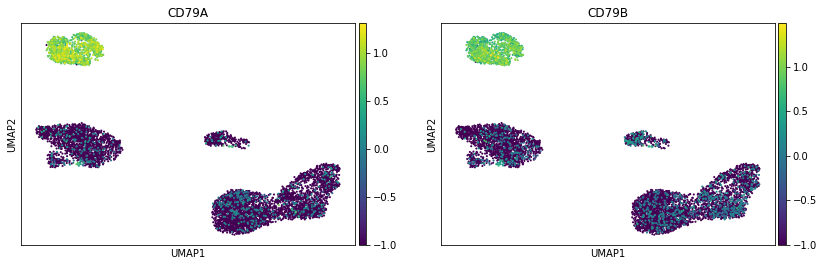

In [103]:
sc.pl.umap(adata, color=["CD79A", "CD79B"])

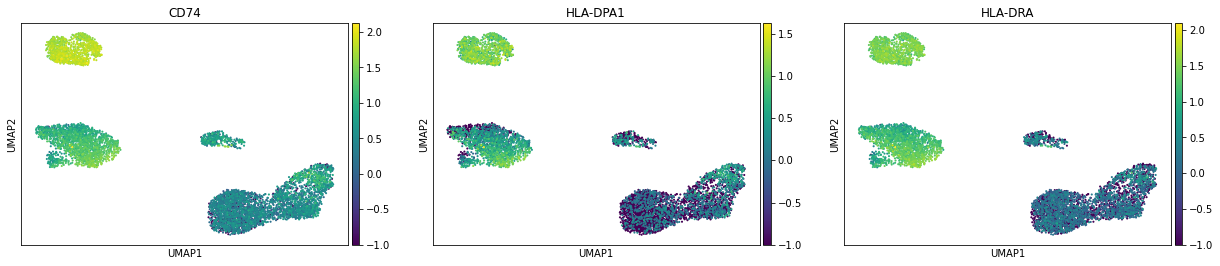

In [105]:
sc.pl.umap(adata, color=["CD74", "HLA-DPA1", "HLA-DRA"])

# 5b.

CD79A and CD79B, which are two of the most prominent differentially expressed genes in cluster 1, are genes encoding a B-cell antigen receptor complex. As such, cluster 1 is likely grouped B-cells.

# 5b.

Wilcoxon signed rank may be another appropriate differential expression method.  A Wilcoxon test is appropriate because this data is not inherently normal.